In [1]:
import pandas as pd
from m2p import PolyMaker
from rdkit import Chem

pm = PolyMaker()

In [13]:
# create dataset
data = pd.DataFrame({'smiles':['C=C','C=CC','O=C(O)c1ccc(C(=O)O)cc1.OCCO','C=C.C=CC']},
                    index=['PE','PP','PET','PE-co-PP'])

# get monomers from smiiles strings
data['monomers'] = data.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
data = pm.polymerize(data,DP=5,mechanism='all',replicate_structures=3)

# output
data.head()

100%|██████████| 4/4 [00:00<00:00, 18.16it/s]


,smiles,monomers,replicate_structure,polymer,mechanism
PE,C=C,"('C=C',)",0,CCCCCCCCCC,vinyl
PP,C=CC,"('C=CC',)",0,CCCCC(C)C(C)CCC(C)CCC,vinyl
PET,O=C(O)c1ccc(C(=O)O)cc1.OCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCO')",0,O=C(OCCO)c1ccc(C(=O)OCCOC(=O)c2ccc(C(=O)OCCO)c...,ester
PE-co-PP,C=C.C=CC,"('C=C', 'C=CC')",0,CCCCCCC(C)C(C)CCC,vinyl
PE,C=C,"('C=C',)",1,CCCCCCCCCC,vinyl


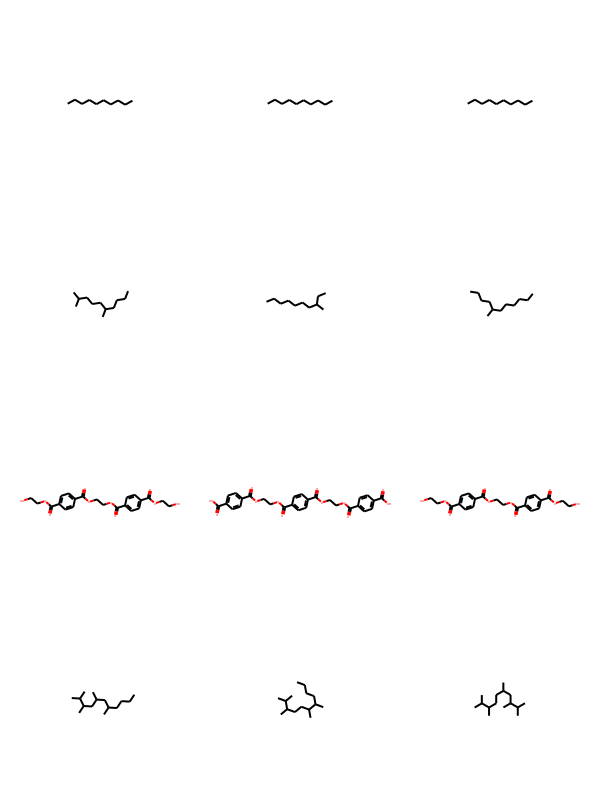

In [14]:
# draw
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in dfpolymer.sort_index().polymer],molsPerRow=3)